## Estimating Smoke from wildfire and comparing to Air Quality Index.



In [2]:
import json
import pandas as pd

### Preparing data for estimating wildfire Smoke impact

In [4]:
## convert json to pandas DF for easier EDA

with open('/Users/sayo/Documents/Projects/Home-Projects/ScratchPad/fires_in_proximity_to_grand_island_1963_1999.json', "r") as read_content2: 
    smoke_json1=json.load(read_content2)

smoke_list1 = []
for key1, value1 in smoke_json1.items():
    df_smoke1 = pd.DataFrame(value1) 
    smoke_list1.append(df_smoke1)


smoke_df_63_99 = pd.concat(smoke_list1, ignore_index=True)
smoke_df_63_99.head(-10)


,wf_year,wf_name,wf_size,wf_type,ring_data,distance,closest_lat_long
0,1990,RATTLESNAKE (4),79.982992,Wildfire,"[[-1906058.9617999997, 434294.07550000027], [-...",1155.50,"[41.57925321596067, -120.57385751078537]"
1,1963,McChord Butte (2),25757.090203,Wildfire,"[[-1561373.1005000006, 710862.5734999999], [-1...",980.34,"[44.470313714712695, -117.03601735251507]"
2,1963,WILLOW CREEK (16),45527.210986,Wildfire,"[[-1516651.6959000006, 689701.9166000001], [-1...",944.72,"[44.408146460059406, -116.32102062064259]"
3,1963,SOUTH CANYON CREEK (4),10395.010334,Wildfire,"[[-1495760.2166000009, 539132.1772000007], [-1...",904.91,"[43.20994411921337, -115.70290012911006]"
4,1963,WEBB CREEK (4),9983.605738,Wildfire,"[[-1520641.9629999995, 654341.4522999991], [-1...",942.43,"[44.10665674996603, -116.33213601936473]"
...,...,...,...,...,...,...,...
20415,1999,Pitchlog Creek RX (1),322.593931,Prescribed Fire,"[[-1919028.2338999994, 506949.0413000006], [-1...",1173.08,"[42.14348484932655, -120.97288768932637]"
20416,1999,Sullivan Creek RX (1),500.150814,Prescribed Fire,"[[-797716.5145999994, -162738.59759999998], [-...",431.76,"[38.279875480288744, -105.67817073955656]"
20417,1999,Black Rock (1),175.846445,Prescribed Fire,"[[-1710397.273, 674730.7530000005], [-1710388....",1067.64,"[43.94610504106865, -118.88011138725838]"
20418,1999,EAST JIM SAGE (1),134.938386,Prescribed Fire,"[[-1349858.1664000005, 373659.12230000086], [-...",786.42,"[42.1143193206346, -113.44181426990382]"


In [6]:
## convert json to pandas DF for easier EDA

with open('/Users/sayo/Documents/Projects/Home-Projects/ScratchPad/fires_in_proximity_to_grand_island_2000_2022.json', "r") as read_content: 
    smoke_json2=json.load(read_content)

smoke_list2 = []
for key, value in smoke_json2.items():
    df_smoke2 = pd.DataFrame(value) 
    smoke_list2.append(df_smoke2)


smoke_df_00_20 = pd.concat(smoke_list2, ignore_index=True)
smoke_df_00_20.head(-10)

,wf_year,wf_name,wf_size,wf_type,ring_data,distance,closest_lat_long
0,2000,Diamond Pt Complex (3),292420.964379,Wildfire,"[[-1374106.8099000007, 712764.9755000006], [-1...",868.13,"[44.887938731841466, -114.61575259078302]"
1,2000,Clear Creek (61),164709.951341,Wildfire,"[[-1348689.1568999998, 725293.2418000009], [-1...",855.74,"[45.03068653898559, -114.30904129214657]"
2,2000,Bear (78),296685.517974,Wildfire,"[[-1310858.2279000003, 796757.0614999998], [-1...",852.97,"[45.68832953851575, -113.99292112550457]"
3,2000,Flossie Complex (3),124303.316381,Wildfire,"[[-1400011.6806000005, 793359.3797999993], [-1...",904.82,"[45.51376846824827, -115.17482747411991]"
4,2000,Jasper (8),84846.799203,Wildfire,"[[-596073.8871999998, 488952.24819999933], [-5...",338.39,"[43.69880127552297, -103.79133000704819]"
...,...,...,...,...,...,...,...
53457,2020,1_PHMA_CLOVER FLAT RX #3 (19),643.395859,Prescribed Fire,"[[-1862174.5377999991, 529038.3557999991], [-1...",1139.97,"[42.44398971147163, -120.34602282975693]"
53458,2020,Malheur WS Alder Creek 01 (1),109.243164,Prescribed Fire,"[[-1692429.6532000005, 610455.6171000004], [-1...",1044.35,"[43.45879959884212, -118.45456109407483]"
53459,2020,Three Springs 03B (1),95.483090,Prescribed Fire,"[[-1739986.1712999996, 516704.8167000003], [-1...",1059.40,"[42.592820212747355, -118.77273604218364]"
53460,2020,PLA Unit 4 (1),162.064891,Prescribed Fire,"[[-1842838.7484000009, 733746.2745999992], [-1...",1163.41,"[44.15275476122087, -120.78890395581696]"


In [7]:
smoke_df=pd.concat([smoke_df_63_99,smoke_df_00_20],axis=0,ignore_index=True)

In [8]:
smoke_df['wf_year'].min()

1963

In [9]:
# max wildfire acres
wf_size_max=smoke_df['wf_size'].max()
wf_size_max

1024244.2529965857

In [10]:
# max wildfire acres
distance_max=smoke_df['distance'].max()
distance_max

1250.0

#### Formulating the Smoke Estimate per fire per year

The Smoke estimate criteria will depend on :\
a. Fire Size: Consider the acreage burned by the fire. Larger fires might produce more smoke.\
b. Proximity to the City: Fires closer to the city might impact air quality more severely. You can define a radius within which fires have a more significant impact.\
c. Amortization: Decide whether to calculate smoke estimate cumulatively during each year or amortize it over the fire season. Amortization can account for long-term exposure and variations in fire intensity.\

Based on the defined criteria, I created this function to calculate the smoke estimate for each fire. For example:

In [11]:
# function to calculate smoke estimate
def calculate_smoke_estimate(fire_acres, distance_to_city):
    # Define a weight for fire size and proximity
    fire_size_weight = 0.7
    proximity_weight = 0.3

    # Calculate normalized values for fire size and proximity
    normalized_fire_size = fire_acres / wf_size_max  
    normalized_proximity = (distance_max - distance_to_city) / distance_max 

    # Calculate smoke estimate based on weighted average
    smoke_estimate = (fire_size_weight * normalized_fire_size + proximity_weight * normalized_proximity) * 100
    return smoke_estimate

In [12]:
# defining the column
smoke_df['wf_smoke_estimate']= calculate_smoke_estimate(smoke_df['wf_size'],smoke_df['distance'])

In [13]:
smoke_df.head(10)

,wf_year,wf_name,wf_size,wf_type,ring_data,distance,closest_lat_long,wf_smoke_estimate
0,1990,RATTLESNAKE (4),79.982992,Wildfire,"[[-1906058.9617999997, 434294.07550000027], [-...",1155.50,"[41.57925321596067, -120.57385751078537]",2.273466
1,1963,McChord Butte (2),25757.090203,Wildfire,"[[-1561373.1005000006, 710862.5734999999], [-1...",980.34,"[44.470313714712695, -117.03601735251507]",8.232159
2,1963,WILLOW CREEK (16),45527.210986,Wildfire,"[[-1516651.6959000006, 689701.9166000001], [-1...",944.72,"[44.408146460059406, -116.32102062064259]",10.438190
3,1963,SOUTH CANYON CREEK (4),10395.010334,Wildfire,"[[-1495760.2166000009, 539132.1772000007], [-1...",904.91,"[43.20994411921337, -115.70290012911006]",8.992587
4,1963,WEBB CREEK (4),9983.605738,Wildfire,"[[-1520641.9629999995, 654341.4522999991], [-1...",942.43,"[44.10665674996603, -116.33213601936473]",8.063990
5,1995,No Fire Name Provided (3),25.981292,Likely Wildfire,"[[624209.3370000012, -257040.23359999992], [62...",574.60,"[37.60849738129869, -88.50368371647882]",16.211376
6,1995,No Fire Name Provided (6),30.980701,Likely Wildfire,"[[636332.1743000001, -270829.1998999994], [636...",584.93,"[37.48353124015235, -88.3721841821294]",15.963797
7,1999,No Fire Name Provided (2),104.208446,Prescribed Fire,"[[-1993506.0771999992, 259752.86060000025], [-...",1196.46,"[39.949501241387615, -121.06417734496833]",1.292082
8,1963,JESSE MORROW (5),2793.704800,Wildfire,"[[-1953796.5231999997, -140594.89350000024], [...",1167.52,"[36.74943819359577, -119.37440388816812]",2.170450
9,1986,No Fire Name Provided (5),69.934778,Likely Wildfire,"[[-1474971.2076999992, 545116.9990999997], [-1...",894.58,"[43.32734498497415, -115.48489238033892]",8.534860


### Getting AQI data

I gathered the AQI annual summary data from this EPA website: https://aqs.epa.gov/aqsweb/airdata/download_files.html 

In [14]:
#AQI= pd.reas_csv('/Users/sayo/Documents/Projects/Home-Projects/ScratchPad/aqi/*.csv')
import os
# Specify the folder path where your CSV files are located
folder_path = '/Users/sayo/Documents/Projects/Home-Projects/ScratchPad/aqi/'

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the combined data
aqi_combined_data = pd.DataFrame()

# Loop through each CSV file and append its data to the combined DataFrame
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    aqi_combined_data = aqi_combined_data.append(df, ignore_index=True)

# Now, combined_data contains the data from all CSV files in the folder
aqi_filtered_data=aqi_combined_data[(aqi_combined_data.County=='Hall') & (aqi_combined_data.State=='Nebraska')]
aqi_filtered_data.head(10)

/var/folders/mm/5m5x03_x20v90n7c9fm6dtzr0000gn/T/ipykernel_1739/3069223026.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aqi_combined_data = aqi_combined_data.append(df, ignore_index=True)
/var/folders/mm/5m5x03_x20v90n7c9fm6dtzr0000gn/T/ipykernel_1739/3069223026.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aqi_combined_data = aqi_combined_data.append(df, ignore_index=True)
/var/folders/mm/5m5x03_x20v90n7c9fm6dtzr0000gn/T/ipykernel_1739/3069223026.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aqi_combined_data = aqi_combined_data.append(df, ignore_index=True)
/var/folders/mm/5m5x03_x20v90n7c9fm6dtzr0000gn/T/ipykernel_1739/3069223026.py:16: FutureWarning: The frame.append method is deprecated and will b

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
9217,Nebraska,Hall,1994,29,29,0,0,0,0,0,44,38,19,0,0,0,0,29
10181,Nebraska,Hall,1995,25,25,0,0,0,0,0,39,25,17,0,0,0,0,25
11700,Nebraska,Hall,2009,118,104,14,0,0,0,0,71,53,25,0,0,0,118,0
12738,Nebraska,Hall,2020,338,314,24,0,0,0,0,85,43,20,0,0,0,338,0
13779,Nebraska,Hall,2008,109,91,18,0,0,0,0,66,54,27,0,0,0,109,0
14831,Nebraska,Hall,2018,111,104,7,0,0,0,0,68,45,23,0,0,0,111,0
15848,Nebraska,Hall,2019,97,92,5,0,0,0,0,60,38,19,0,0,0,97,0
16873,Nebraska,Hall,2014,120,113,7,0,0,0,0,74,48,24,0,0,0,120,0
17952,Nebraska,Hall,2000,110,80,29,1,0,0,0,112,62,31,0,0,0,110,0
19067,Nebraska,Hall,2001,106,85,20,1,0,0,0,102,55,33,0,0,0,106,0


In [15]:
aqi_filtered_data.columns

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days PM2.5', 'Days PM10'],
      dtype='object')

In [16]:
aqi_filtered_data=aqi_filtered_data.sort_values('Year',ascending=True)
aqi_filtered_data.head(60)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
9217,Nebraska,Hall,1994,29,29,0,0,0,0,0,44,38,19,0,0,0,0,29
10181,Nebraska,Hall,1995,25,25,0,0,0,0,0,39,25,17,0,0,0,0,25
35131,Nebraska,Hall,1999,73,59,14,0,0,0,0,97,63,33,0,0,0,73,0
17952,Nebraska,Hall,2000,110,80,29,1,0,0,0,112,62,31,0,0,0,110,0
19067,Nebraska,Hall,2001,106,85,20,1,0,0,0,102,55,33,0,0,0,106,0
24430,Nebraska,Hall,2002,114,97,17,0,0,0,0,84,55,25,0,0,0,114,0
21229,Nebraska,Hall,2003,111,84,27,0,0,0,0,91,58,33,0,0,0,111,0
32008,Nebraska,Hall,2004,106,86,20,0,0,0,0,80,59,31,0,0,0,106,0
30889,Nebraska,Hall,2005,113,91,22,0,0,0,0,75,58,28,0,0,0,113,0
25534,Nebraska,Hall,2006,119,106,13,0,0,0,0,68,52,26,0,0,0,119,0


### Visualizing wildfire activity over the years

In [17]:
# Standard python libaries and modules for data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#### Produce a histogram showing the number of fires occurring every 50 mile distance from your assigned city up to the max specified distance.

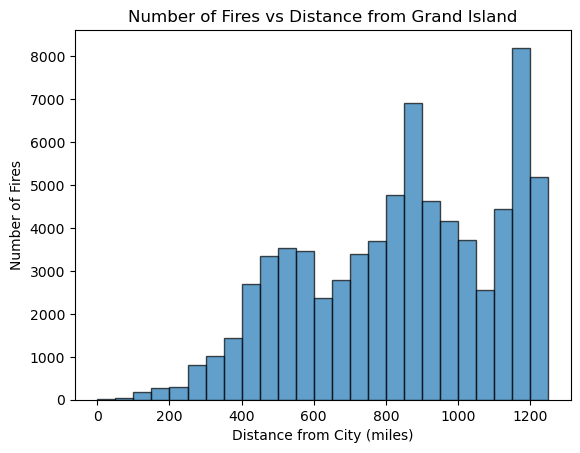

In [18]:
# Define bins for the histogram (every 50 miles up to the specified maximum distance)
bins = list(range(0, 1300, 50))

# Create the histogram
plt.hist(smoke_df['distance'], bins=bins, edgecolor='black', alpha=0.7)

# Set labels and title
plt.xlabel('Distance from City (miles)')
plt.ylabel('Number of Fires')
plt.title('Number of Fires vs Distance from Grand Island')

# Show the histogram
plt.show()

#### Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.

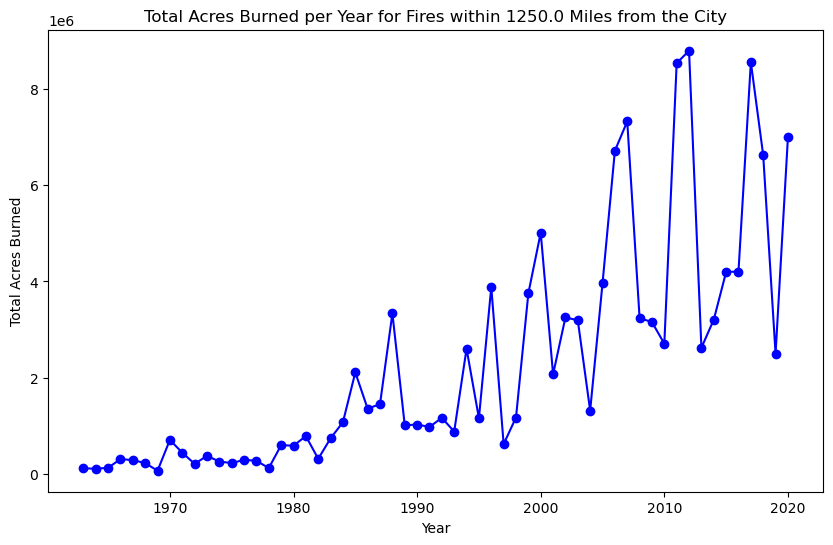

In [19]:
total_acres_burned_per_year=smoke_df.groupby('wf_year')['wf_size'].sum()
# Plotting the time series graph
plt.figure(figsize=(10, 6))
plt.plot(total_acres_burned_per_year.index, total_acres_burned_per_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned')
plt.title('Total Acres Burned per Year for Fires within {} Miles from the City'.format(distance_max))
plt.show()

#### Produce a time series graph containing your fire smoke estimate for your city and the AQI estimate for your city.

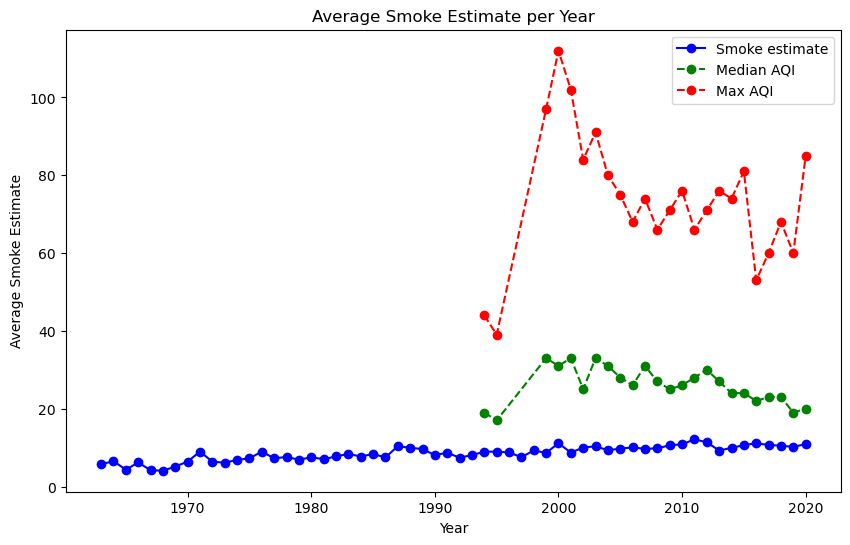

In [24]:
average_smoke_estimate=smoke_df.groupby('wf_year')['wf_smoke_estimate'].mean()
# Plotting the time series graph
plt.figure(figsize=(10, 6))
plt.plot(average_smoke_estimate.index, average_smoke_estimate.values, marker='o', linestyle='-', color='b',label='Smoke estimate')
plt.plot(aqi_filtered_data.Year, aqi_filtered_data["Median AQI"],marker='o', linestyle='--', color='g',label='Median AQI')
plt.plot(aqi_filtered_data.Year, aqi_filtered_data["Max AQI"],marker='o', linestyle='--', color='r',label='Max AQI')
plt.xlabel('Year')
plt.ylabel('Average Smoke Estimate')
plt.title('Average Smoke Estimate per Year')
plt.legend()
plt.show()

#### Forecasting wildire

Let us build a ML model that can be used to predict the wildfire estimate for the next 30 years. 
I plan to use the ARIMA model for predicting the smoke estimate for next 25 years

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [27]:
# Split the data into training and testing sets
train_smoke_df, test_smoke_df= train_test_split(smoke_df,test_size=0.2, shuffle=False)